<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação 
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
penguim.shape

(344, 7)

### **1.1. Análise exploratória** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data

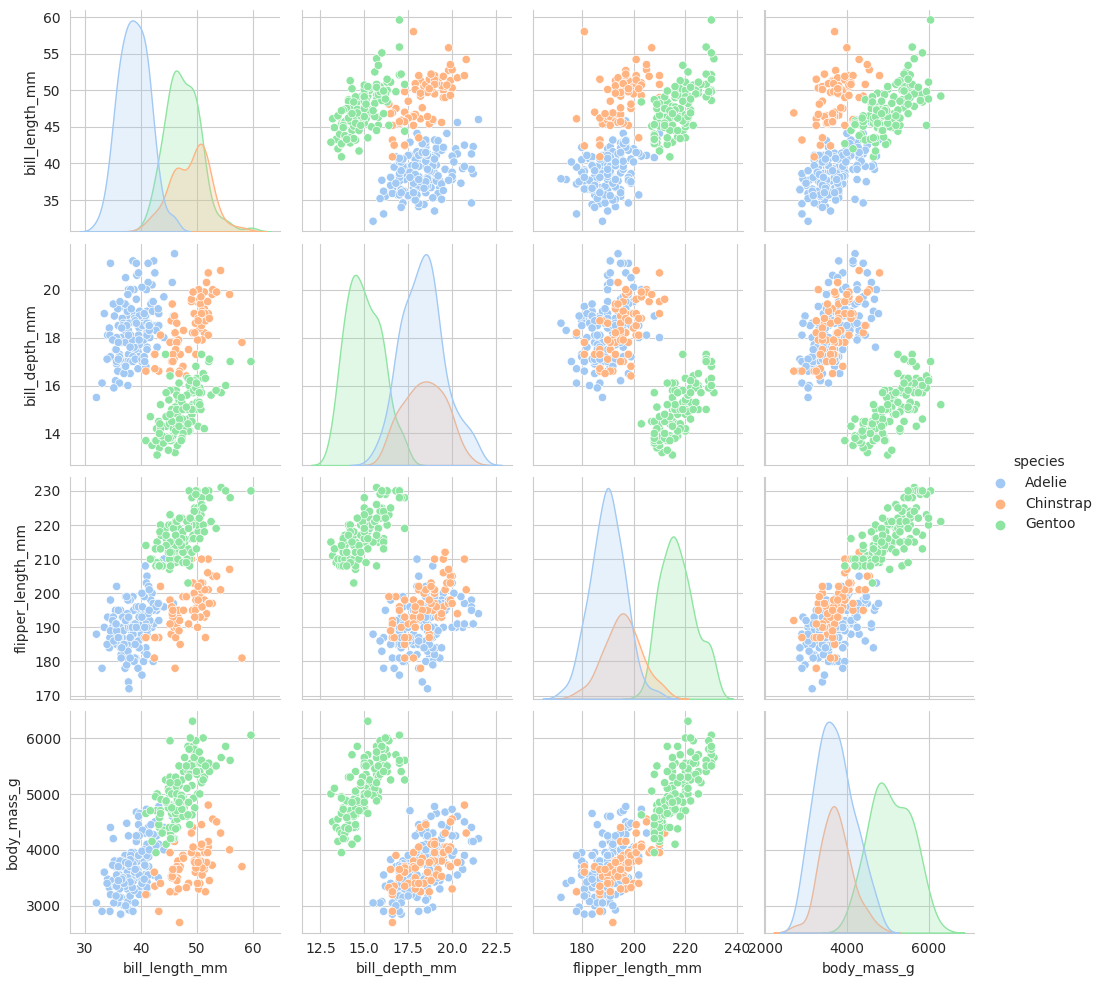

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:** 

- O comprimento do bico da espécie Adelie é maior que as demais.

- Os pontos estão amplamente dispersos para cada espécie quando se trata do comprimento da nadadeira em relação ao comprimento do bico de cada uma. Observa-se que a espécie Gentoo é de longe a que apresenta maior comprimento em ambas as variáveis em comparação com as outras espécies.

- A profundidade do bico de Adelie e Chinstrap, em sua maioria, é maior do que a do Gentoo, no entanto, são as mais leves. A espécie Gentoo é mais pesada e não tem correlação com a profundidade do bico.

- Em relação ao comprimento da nadadeira e a profundidade do bico, é possível observar que a espécie Gentoo se destaca, mostrando uma forte ligação entre elas, e estão dispersas das demais espécies.

- Gentoo é a espécie mais pesada.

- De modo geral, em quase todas as variáveis, a espécie Gentoo apresenta pontos amplamente dispersos em comparação com as espécies Adelie e Chinstrap, enquanto Adelie e Chinstrap têm uma correlação significativa entre as variáveis em comum.

 - Sexo por espécie:

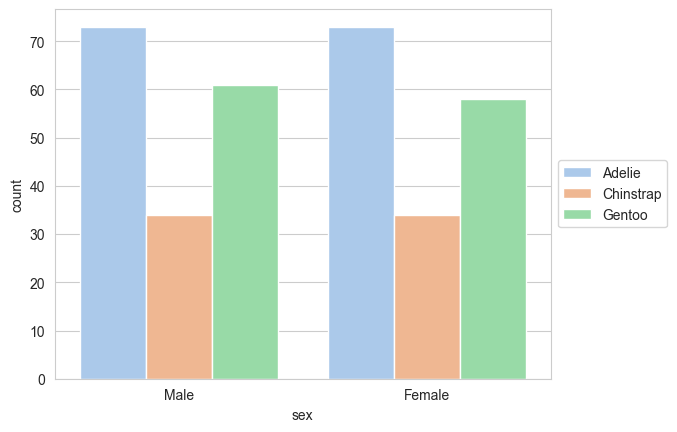

In [6]:
import matplotlib.pyplot as plt

with sns.axes_style('whitegrid'):
    grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")
    # Mover a legenda para a direita do gráfico
    grafico.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


In [7]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:

# Criando uma tabela dinâmica para contar o número de pinguins por espécie e sexo
total_por_especie_e_sexo = penguim.pivot_table(index='species', columns='sex', aggfunc='size', fill_value=0)

# Imprimir os resultados
print("Total de pinguins por espécie e sexo:")
print(total_por_especie_e_sexo)


Total de pinguins por espécie e sexo:
sex        Female  Male
species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61


**Comentário:** 

- Criei uma tabela dinâmica para saber os valores exatos para confirmar que há duas espécies que tem a quantidade exata por gênero e espécie.

 - Podemos perceber que tanto a espécie Adelie quanto Chinstrap, ambas tem a quantidade exata no sexo masculino e feminino.

 - Já na espécie Gentoo, temos um total de 61 Penguins masculinos e 58 femininos, uma diferença bem pequena.
 
 - Vale ressaltar que existem valores ausentes na coluna "sex", o que significa que poderia ter alguma diferença na quantidade, caso fossem preenchidos.

 - Ilha por espécie:

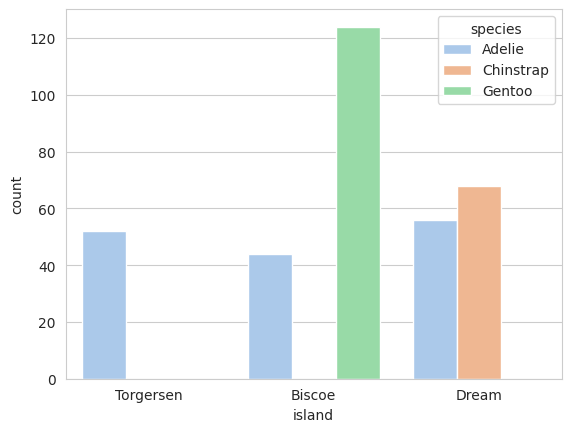

In [9]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:** 

- É notável que a espécie Gentoo habitam mais de 120 penguins na ilha Biscoe, contando com uma pequena quantidade da espécie Adelie.

- Curiosamente, a espécie Adelie é a única espécie que habitam nas 3 ilhas disponibilizadas pelo dataset, sendo bem distribuidas em todas. 

- O que pode significar que é uma espécie que se adapta bem, independente de suas características, tanto dos Penguins quanto das ilhas em si.

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [10]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [11]:
penguim.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [12]:
penguim.dropna(inplace=True)
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### **2.2. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [13]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [14]:
# Filtrando as 2 variáveis categóricas

island = penguim["island"].value_counts()
print(island)
sex = penguim["sex"].value_counts()
print(sex)

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64
sex
Male      168
Female    165
Name: count, dtype: int64


In [15]:
# One Hot Encoding

penguim["island_Biscoe_nom"] = penguim["island"].apply(lambda ilha: 1 if ilha == "Biscoe" else 0)
penguim["island_Dream_nom"] = penguim["island"].apply(lambda ilha: 1 if ilha == "Dream" else 0)
penguim["island_Torgersen_nom"] = penguim["island"].apply(lambda ilha: 1 if ilha == "Torgersen" else 0)

penguim["sexo_M_nom"] = penguim["sex"].apply(lambda sexo: 1 if sexo == "Male" else 0)
penguim["sexo_F_nom"] = penguim["sex"].apply(lambda sexo: 1 if sexo == "Female" else 0)
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sexo_M_nom,sexo_F_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,0,1,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,0,1,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0,1,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,0,1,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,0,1,1,0


### **2.3. Limpeza** 

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe. 

In [16]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   species               333 non-null    object 
 1   island                333 non-null    object 
 2   bill_length_mm        333 non-null    float64
 3   bill_depth_mm         333 non-null    float64
 4   flipper_length_mm     333 non-null    float64
 5   body_mass_g           333 non-null    float64
 6   sex                   333 non-null    object 
 7   island_Biscoe_nom     333 non-null    int64  
 8   island_Dream_nom      333 non-null    int64  
 9   island_Torgersen_nom  333 non-null    int64  
 10  sexo_M_nom            333 non-null    int64  
 11  sexo_F_nom            333 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 33.8+ KB


In [17]:
# Removendo as colunas categóricas originais
remocao_colunas = ["island", "sex"]
penguim.drop(remocao_colunas, axis=1, inplace=True)
penguim.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sexo_M_nom,sexo_F_nom
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,0,1
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,1,0


In [18]:
penguim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   species               333 non-null    object 
 1   bill_length_mm        333 non-null    float64
 2   bill_depth_mm         333 non-null    float64
 3   flipper_length_mm     333 non-null    float64
 4   body_mass_g           333 non-null    float64
 5   island_Biscoe_nom     333 non-null    int64  
 6   island_Dream_nom      333 non-null    int64  
 7   island_Torgersen_nom  333 non-null    int64  
 8   sexo_M_nom            333 non-null    int64  
 9   sexo_F_nom            333 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 28.6+ KB


### **2.4. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguim.drop(["species"], axis=1),
    penguim["species"],
    test_size=0.33,
    random_state=123
)

- **Variáveis preditoras (predictors)**

In [21]:
predictors_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sexo_M_nom,sexo_F_nom
84,37.3,17.8,191.0,3350.0,0,1,0,0,1
267,50.5,15.9,225.0,5400.0,1,0,0,1,0
131,43.1,19.2,197.0,3500.0,0,0,1,1,0
67,41.1,19.1,188.0,4100.0,1,0,0,1,0
223,50.0,15.2,218.0,5700.0,1,0,0,1,0


In [22]:
predictors_train.shape

(223, 9)

In [23]:
predictors_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sexo_M_nom,sexo_F_nom
111,45.6,20.3,191.0,4600.0,1,0,0,1,0
158,46.1,18.2,178.0,3250.0,0,1,0,0,1
288,43.5,14.2,220.0,4700.0,1,0,0,0,1
308,47.5,14.0,212.0,4875.0,1,0,0,0,1
185,51.0,18.8,203.0,4100.0,0,1,0,1,0


In [24]:
predictors_test.shape

(110, 9)

- **Variável resposta (target)**

In [25]:
target_train.head()

84     Adelie
267    Gentoo
131    Adelie
67     Adelie
223    Gentoo
Name: species, dtype: object

In [26]:
target_train.shape

(223,)

In [27]:
target_test.head()

111       Adelie
158    Chinstrap
288       Gentoo
308       Gentoo
185    Chinstrap
Name: species, dtype: object

In [28]:
target_test.shape

(110,)

## 3\. Modelagem 

### **3.1. Treino** 

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** 

Existem **8 folhas** na árvore de decisão treinada mostrada abaixo. Pelo fato de que uma folha é considerada um nó quando não possui filhos, representando os resultados finais. São elas:

A Folha 1 possui o valor [8, 0, 0], que indica que a classe predominante para este nó é a classe 0 (com 8 amostras), seguida pelas classes 1 e 2, ambas com 0 amostras.

A Folha 2 possui o valor de [0, 2, 0], que indica que a classe predominante para este nó é a classe 1 (com 2 amostras), seguida pelas classes 0 e 2, ambas com 0 amostras.

A Folha 3 possui o valor de [87, 0, 0], que indica que a classe predominante para este nó é a classe 0 (87 amostras), seguida pelas classes 1 e 2, ambas com 0 amostras. 

A Folha 4 possui o valor [2, 0, 0], que indica que a classe predominante para este nó é a classe 0 (2 amostras), seguida pelas classes 1 e 2, ambas com 0 amostras.

A Folha 5 possui o valor [0, 33, 0], que indica que a classe predominante para este nó é a classe 1 (33 amostras), seguida pelas classes 0 e 2, ambas com 0 amostras.

A Folha 6 possui o valor [2, 0, 0], que indica que a classe predominante para este nó é a classe 0 (2 amostras), seguida pelas classes 1 e 2, ambas com 0 amostras.

A Folha 7 possui o valor [0, 3, 0], que indica que a classe predominante para este nó é a classe 1 (3 amostras), seguida pelas classes 0 e 2, ambas com 0 amostras.

E a Folha 8 possui o valor [0, 86, 0], que indica que a classe predominante para este nó é a classe 1 (86 amostras), seguida pelas classes 0 e 2, ambas com 0 amostras.

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [30]:
model = model.fit(predictors_train, target_train)

In [31]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
        'body_mass_g', 'island_Biscoe_nom', 'island_Dream_nom',
        'island_Torgersen_nom', 'sexo_M_nom', 'sexo_F_nom'], dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x178cd7ec0>}

In [32]:
predictors_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sexo_M_nom,sexo_F_nom
84,37.3,17.8,191.0,3350.0,0,1,0,0,1
267,50.5,15.9,225.0,5400.0,1,0,0,1,0
131,43.1,19.2,197.0,3500.0,0,0,1,1,0
67,41.1,19.1,188.0,4100.0,1,0,0,1,0
223,50.0,15.2,218.0,5700.0,1,0,0,1,0


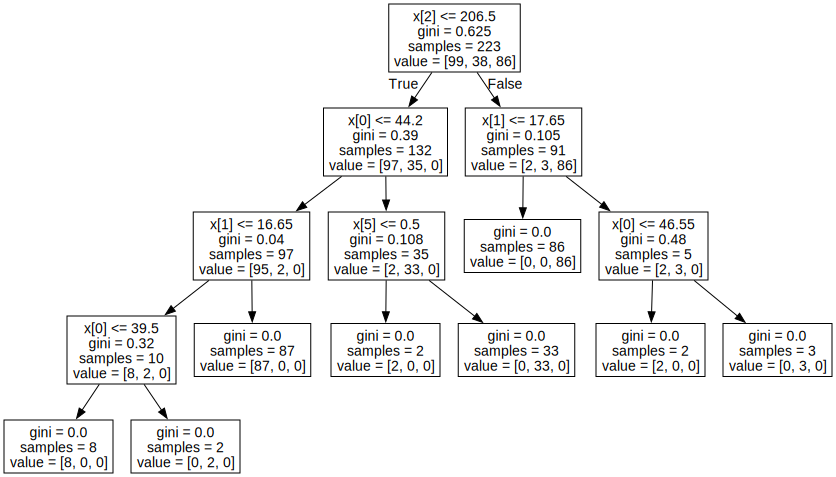

In [33]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

In [34]:
penguim.head(1)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sexo_M_nom,sexo_F_nom
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,1,0


In [35]:
features = np.array([39.1, 18.7, 181.0, 3750.0, 0, 0, 1, 1, 0])
prediction = model.predict(features.reshape(1, -1))
print(prediction)

['Adelie']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### **3.2. Avaliação** 

- **Posição predita**

In [36]:
target_predicted = model.predict(predictors_test)
target_predicted[0:5]

array(['Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap'],
      dtype=object)

In [37]:
target_predicted.shape

(110,)

- **Posição teste**

In [38]:
target_test[0:5]

111       Adelie
158    Chinstrap
288       Gentoo
308       Gentoo
185    Chinstrap
Name: species, dtype: object

In [39]:
target_test.shape

(110,)

**a.** Matriz de Confusão 

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** 

- Conforme o plot da matriz de confusão, é possível observar que apenas a espécie Gentoo o modelo acertou todas as classificações (32).

- Adelie foi a que mais teve erros, o modelo classificou corretamente 46 e errou 4, as 4 classificou na espécie Chinstrap. 
- E Chinstrap obteve 26 acertos e dois erros, classificando 1 Adelie e 1 Gentoo.

- O que podemos extrair de informações, é que voltando na análise exploratória, com os gráficos comparando com todas as variáveis numéricas, a espécie Gentoo é a espécie que em todas as relações, em sua grande parte dos gráficos, os pontos estavam bem distante das demais espécies, o que significa que as chances do modelo acertar são bem maiores, o que de fato aconteceu e se provou, fazendo a avaliação da matriz de confusão. Enquanto as espécies Adelie e Chinstrap teve erros, mais pela Adelie. Acredito que pela quantidade que teve maior valor que as demais (46), a tendência pode ser que tenha mais riscos de erro.

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(target_test, target_predicted, labels=model.classes_)
print(CM)

[[47  0  0]
 [ 4 26  0]
 [ 1  0 32]]


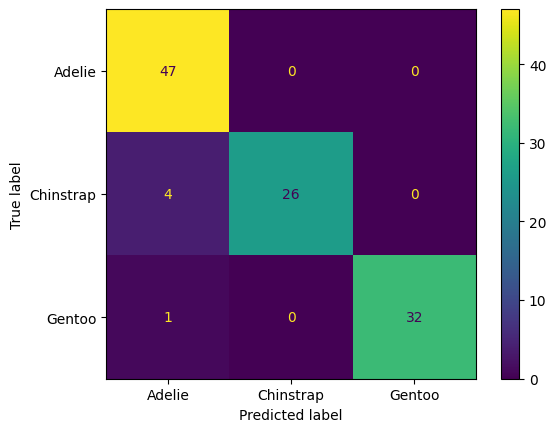

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test, target_predicted) 
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=model.classes_) 
disp.plot()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [42]:
# Pegando variáveis respostas de teste e predição para o modelo de árvore de decisão antes de calcular a acurácia
y_true = target_test
y_pred = target_predicted

conf_matrix = confusion_matrix(y_true, y_pred)

In [43]:
# Totalizando a quantidade total dos valores avaliados
total = conf_matrix.sum()
print(total)

110


In [44]:
# Filtrando apenas o número de acertos
acertos = np.diag(conf_matrix).sum()
print(acertos)

105


In [45]:
acuracia = acertos / total
print(acuracia)

0.9545454545454546


In [46]:
print(f"{round(100 * acuracia, 2)}%")

95.45%


In [47]:
# Calculando novamente, porém com o pacote Scikit-Learn
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_true, y_pred)
print(acuracia)

0.9545454545454546


In [48]:
# Podemos analisar que o resultado foi o mesmo
print(f"{round(100 * acuracia, 2)}%")

95.45%


## 4\. Predição  

### **4.1. Novo penguim** 

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [49]:
predictors_test.head(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sexo_M_nom,sexo_F_nom
111,45.6,20.3,191.0,4600.0,1,0,0,1,0


In [50]:
penguim.head(1)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe_nom,island_Dream_nom,island_Torgersen_nom,sexo_M_nom,sexo_F_nom
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,1,0


In [51]:
pinguim = np.array([38.2, 18.1, 185.0, 3950.0, 1, 0, 0, 1, 0])

In [52]:
especie = model.predict(pinguim.reshape(1, -1))
print(especie)

['Adelie']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---